## Overview: 
Here I explore the UCI Default of Credit Cards data set (available on Kaggle:https://www.kaggle.com/uciml/default-of-credit-card-clients-dataset  ) and compare several machine learning models (with/without feature engineering) for predicting default.

This notebook proceeds as follows:
1. Read and Explore the Data
    1. Look for NAs, outliers, any unusual distributions
    1. Look at associations/correlations
1. Prepare the Data
    1. Cleaning the Data
    1. Feature Engineering
        1. Indicator variables
        1. Feature interactions

Introduction
This notebook was created to learn basic techniques of data manipulation and machine learning. The idea is to use the dataset UCI_Credit_Card to improve basic skills of data cleaning, data analysis, data visualization and machine learning. It is primarily intended to help myself understanding what to do and how. Any feedback is welcome.

Variables
There are 25 variables:

* ID: ID of each client
* LIMIT_BAL: Amount of given credit in NT dollars (includes individual and family/supplementary credit
* SEX: Gender (1=male, 2=female)
* EDUCATION: (1=graduate school, 2=university, 3=high school, 4=others, 5=unknown, 6=unknown)
* MARRIAGE: Marital status (1=married, 2=single, 3=others)
* AGE: Age in years
* PAY_0: Repayment status in September, 2005 (-1=pay duly, 1=payment delay for one month, 2=payment delay for two months, ... 8=payment delay for eight months, 9=payment delay for nine months and above)
* PAY_2: Repayment status in August, 2005 (scale same as above)
* PAY_3: Repayment status in July, 2005 (scale same as above)
* PAY_4: Repayment status in June, 2005 (scale same as above)
* PAY_5: Repayment status in May, 2005 (scale same as above)
* PAY_6: Repayment status in April, 2005 (scale same as above)
* BILL_AMT1: Amount of bill statement in September, 2005 (NT dollar)
* BILL_AMT2: Amount of bill statement in August, 2005 (NT dollar)
* BILL_AMT3: Amount of bill statement in July, 2005 (NT dollar)
* BILL_AMT4: Amount of bill statement in June, 2005 (NT dollar)
* BILL_AMT5: Amount of bill statement in May, 2005 (NT dollar)
* BILL_AMT6: Amount of bill statement in April, 2005 (NT dollar)
* PAY_AMT1: Amount of previous payment in September, 2005 (NT dollar)
* PAY_AMT2: Amount of previous payment in August, 2005 (NT dollar)
* PAY_AMT3: Amount of previous payment in July, 2005 (NT dollar)
* PAY_AMT4: Amount of previous payment in June, 2005 (NT dollar)
* PAY_AMT5: Amount of previous payment in May, 2005 (NT dollar)
* PAY_AMT6: Amount of previous payment in April, 2005 (NT dollar)
* default.payment.next.month: Default payment (1=yes, 0=no)

In [1]:
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load in 

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)
import matplotlib.pyplot as plt
%matplotlib inline

# Input data files are available in the "../input/" directory.
# For example, running this (by clicking run or pressing Shift+Enter) will list all files under the input directory

import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))
        data_path = os.path.join(dirname, filename)

# Any results you write to the current directory are saved as output.

/kaggle/input/default-of-credit-card-clients-dataset/UCI_Credit_Card.csv


In [2]:
df_o = pd.read_csv(data_path, nrows =10000)
#df_o.describe()
df_o.sample(10)
#df.columns
#df_o.info

,ID,LIMIT_BAL,SEX,EDUCATION,MARRIAGE,AGE,PAY_0,PAY_2,PAY_3,PAY_4,...,BILL_AMT4,BILL_AMT5,BILL_AMT6,PAY_AMT1,PAY_AMT2,PAY_AMT3,PAY_AMT4,PAY_AMT5,PAY_AMT6,default.payment.next.month
7429,7430,120000.0,1,3,2,50,-1,-1,-1,-1,...,0,0.0,0.0,0.0,780.0,0.0,0.0,0.0,0.0,1
1931,1932,20000.0,2,1,2,24,-1,-1,-1,2,...,930,780.0,240.0,1097.0,1003.0,0.0,240.0,0.0,780.0,1
9111,9112,480000.0,1,2,1,39,0,0,0,0,...,315067,321825.0,328781.0,15000.0,30000.0,20000.0,12000.0,12500.0,12200.0,0
5040,5041,130000.0,2,1,2,29,-1,-1,-1,-1,...,978,652.0,326.0,2038.0,311.0,1000.0,0.0,0.0,326.0,1
8152,8153,150000.0,2,2,1,35,0,0,0,0,...,49019,44801.0,39742.0,7000.0,6000.0,1800.0,1600.0,2000.0,1700.0,0
3477,3478,300000.0,2,3,2,29,0,0,0,0,...,-4394,-4394.0,-4394.0,7951.0,6890.0,0.0,0.0,0.0,0.0,0
1440,1441,70000.0,2,1,2,24,0,0,2,2,...,51648,55409.0,54366.0,5000.0,1900.0,0.0,4600.0,0.0,2300.0,0
1905,1906,340000.0,2,1,1,36,0,0,0,0,...,251815,218706.0,165666.0,160444.0,10143.0,7190.0,6283.0,5208.0,4177.0,0
4657,4658,50000.0,2,2,1,45,0,0,0,0,...,45632,46535.0,47351.0,2850.0,3160.0,1740.0,1748.0,1650.0,3530.0,0
5415,5416,500000.0,1,2,2,67,-1,-1,-1,-1,...,1821,2498.0,3622.0,2681.0,2547.0,1826.0,2505.0,3630.0,3099.0,0


In [48]:
print('hello \nthere')

hello 
there


In [51]:
# A simple fucntion for describing the data
def quick_analysis(df):
    print('\n Rows and Columns:')
    print(df.shape)
    print('\n Data Types:')
    print(df.dtypes)

    print('\n Column Names:')
    print(df.columns)
    print('\n Null Values:')
    print(df.apply(lambda x: sum(x.isnull()) / len(df)))
quick_analysis(df)


 Data Types:
limit_bal       float64
sex               int64
education         int64
marriage          int64
age               int64
pay_0             int64
pay_2             int64
pay_3             int64
pay_4             int64
pay_5             int64
pay_6             int64
bill_amt1         int64
bill_amt2       float64
bill_amt3       float64
bill_amt4         int64
bill_amt5       float64
bill_amt6       float64
pay_amt1        float64
pay_amt2        float64
pay_amt3        float64
pay_amt4        float64
pay_amt5        float64
pay_amt6        float64
default_next      int64
dtype: object

 Rows and Columns:
(10000, 24)

 Column Names:
Index(['limit_bal', 'sex', 'education', 'marriage', 'age', 'pay_0', 'pay_2',
       'pay_3', 'pay_4', 'pay_5', 'pay_6', 'bill_amt1', 'bill_amt2',
       'bill_amt3', 'bill_amt4', 'bill_amt5', 'bill_amt6', 'pay_amt1',
       'pay_amt2', 'pay_amt3', 'pay_amt4', 'pay_amt5', 'pay_amt6',
       'default_next'],
      dtype='object')

 Null Values:
lim

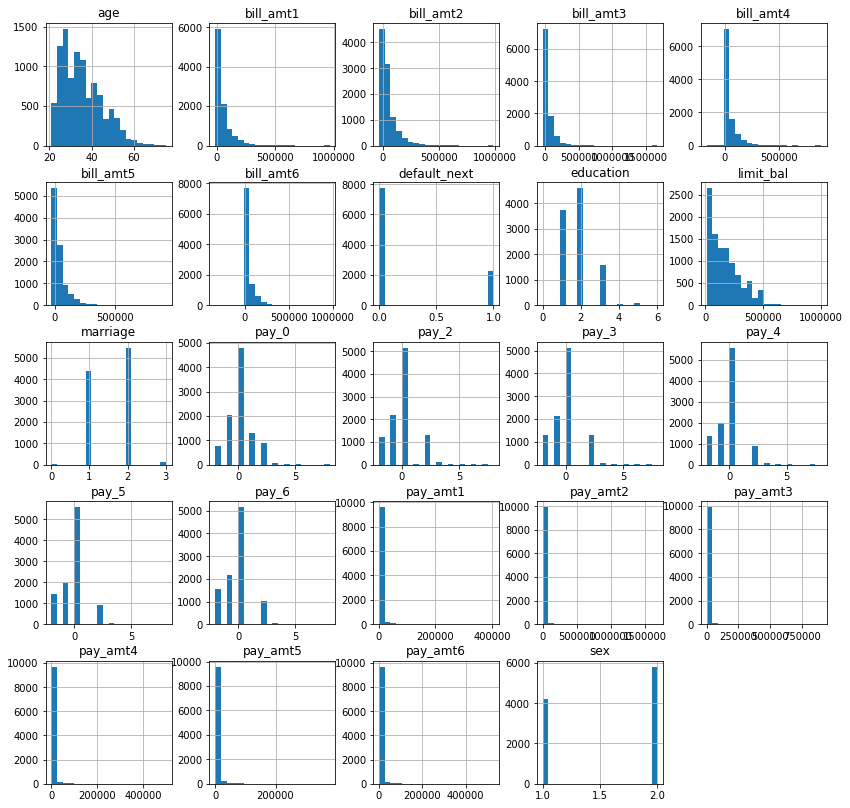

In [54]:
_=df[df.dtypes[(df.dtypes=="float64")|(df.dtypes=="int64")]
                        .index.values].hist(figsize=[14,14], bins=20)

Many of these could use a transformation to make the data more normal. That sould help for logisitic regression, though likely not for decision tree based classifier models.  

In [3]:
# Check for NAs
df = df_o.dropna(axis = 0, how ='any') 

print("Old data frame length:", len(df_o), "\nNew data frame length:",  
       len(df), "\nNumber of rows with at least 1 NA value: ", 
       (len(df_o)-len(df))) 

# Set the ID column as the index
df.set_index('ID',inplace=True)


Old data frame length: 10000 
New data frame length: 10000 
Number of rows with at least 1 NA value:  0


In [4]:
df.rename(columns = {"default.payment.next.month":"default_next"},inplace=True)
df.rename(str.lower, axis='columns',inplace=True)
df.columns

Index(['limit_bal', 'sex', 'education', 'marriage', 'age', 'pay_0', 'pay_2',
       'pay_3', 'pay_4', 'pay_5', 'pay_6', 'bill_amt1', 'bill_amt2',
       'bill_amt3', 'bill_amt4', 'bill_amt5', 'bill_amt6', 'pay_amt1',
       'pay_amt2', 'pay_amt3', 'pay_amt4', 'pay_amt5', 'pay_amt6',
       'default_next'],
      dtype='object')

## Data Associations

We'll start with a heatmap of all the correlations between features. 

Text(0.5, 1.0, 'Correlation for all Features')

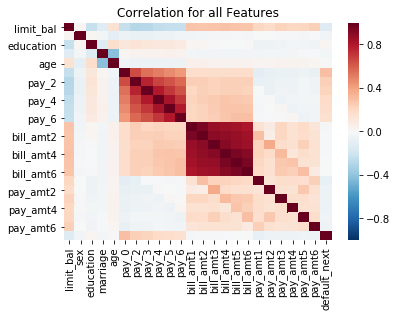

In [5]:
import seaborn as sn

corr = df.corr()
#cmap = sn.diverging_palette(255, 133, l=60, n=7, center="dark")
ax = sn.heatmap(corr,cmap='RdBu_r',vmin=-1,vmax=1)

ax.set_title("Correlation for all Features")

There are some interesting trends that emerge here. The PAY, BILL, and PAY AMNT   features each form correlation clusters with themselves (these are the 6x6 squares that are present). 

The BILL attributes are the most highly correlated with each other. We could perhaps reduce these down to one variable and perhaps engineer a few more interesting features. 

The PAY featurs, which you'll recall are represneted on a -2 to 6 scale (with higher (positive) values indicative of a longer duration of missed payments) are also correlated each other, though decreasingly so for the older features in the group.   

It's also worth noting that the PAY features are the feature with the highest correlation with defaulting on the credit card (our target variable "default_next")--though its modest ~0.35 or so. Yet PAY_AMT and BILL_AMT are even less correlated with default. The demographic info (age, education, etc) are also poorly corrlation with our target variable.   

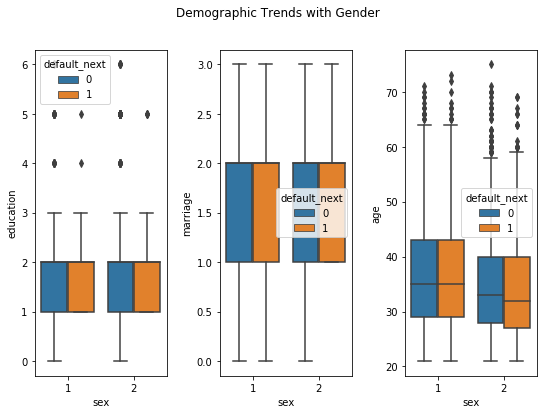

In [6]:
fig, axes = plt.subplots(1,3, figsize=(9,6))
plt.subplots_adjust(wspace=.4)
fig.suptitle('Demographic Trends with Gender')
sn.catplot(ax=axes[0],x='sex',y='education',hue='default_next',kind='box',data=df) 
sn.catplot(ax=axes[1],x='sex',y='marriage',hue='default_next',kind='box',data=df) 
sn.catplot(ax=axes[2],x='sex',y='age',hue='default_next',kind='box',data=df) 

plt.close(2)
plt.close(3)
plt.close(4)

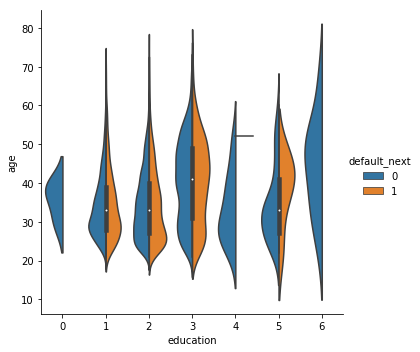

In [7]:
sn.catplot(x="education", y="age", hue="default_next",
            kind="violin", split=True, data=df);

Education levels 0, 4,5 and 6 deserve a closer look. 4 though six are catagarized as "unknown", but the distributions for 4,5,6 are striking (in the violin plot below) because the are each quite different from each other as fron level 1,2,3. Level 5 in particulare may form a good indicator variable for default. Where as 4 and 6 have no apparent risk for default. But we should first look at how many instance are in each of these groups (if it's very few, then they could be dropped altogether). 

In [8]:
df["education"].value_counts()

2    4588
1    3714
3    1590
5      69
4      26
6      10
0       3
Name: education, dtype: int64

Very few are in education levels 0,4,5, or 6. Level 0 we will drop. Level 5 and age greater than 50 may be an indicator of default based on the above plot.

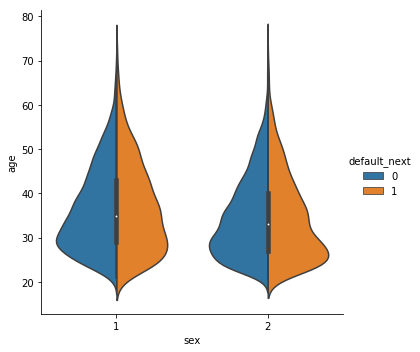

In [9]:
sn.catplot(x="sex", y="age", hue="default_next",
            kind="violin", split=True, data=df);

In the age vs sex violin plot we observe the slight trend of lower peak default age for both men and women alike. Nother terrible interesting here. 

Finally, we look at simiar age-based trends, but based on marriage status.

TypeError: boxplot() got an unexpected keyword argument 'split'

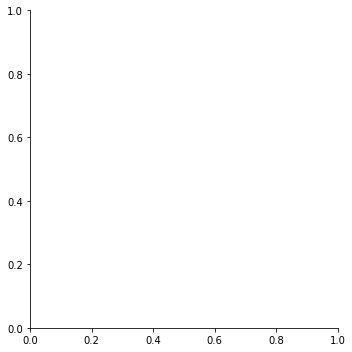

In [40]:
sn.catplot(x="marriage", y="age", hue="default_next",
            kind="violin", split=True, data=df);

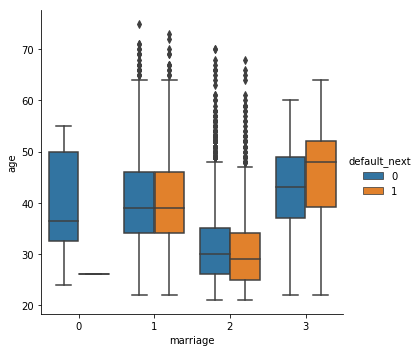

In [41]:
sn.catplot(x="marriage", y="age", hue="default_next",
            kind="box", data=df);

In [11]:
df["marriage"].value_counts()

2    5468
1    4390
3     125
0      17
Name: marriage, dtype: int64

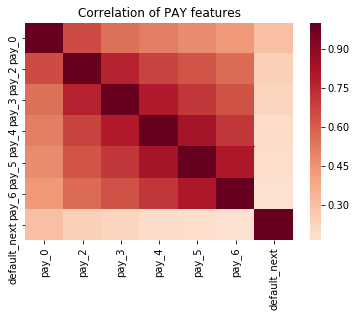

In [12]:
from pandas.plotting import scatter_matrix
attributes_pay = ['pay_0','pay_2','pay_3','pay_4','pay_5','pay_6','default_next']
#scatter_matrix(df[attributes_pay],figsize=(10,7.5))
#attributes_pay = ['PAY_0','PAY_2','PAY_3','PAY_4','PAY_5','PAY_6']
corr = df[attributes_pay].corr()
ax = sn.heatmap(corr, cmap='RdBu_r',center=0)
ax = ax.set_title('Correlation of PAY features')


In [13]:
attributes_bil = ['bill_amt1','bill_amt2','bill_amt3','bill_amt4','bill_amt5',
                  'bill_amt6','default_next']
#scatter_matrix(df[attributes_bil],figsize=(15,11))

Looking at the top row, it's not surprising to see that BILL_AMT1 is most correlated with BILL_AMT2 and progressively less with bills amount for previous montion. 

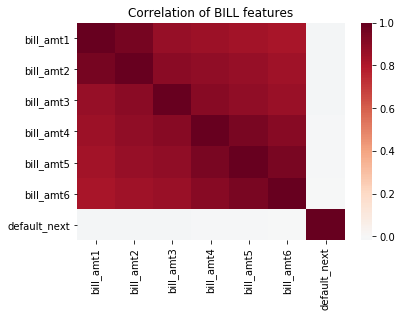

In [14]:
corr = df[attributes_bil].corr()
ax=sn.heatmap(corr, cmap='RdBu_r',center=0)
ax = ax.set_title('Correlation of BILL features')

In [15]:
attributes_payamt = ['pay_amt1','pay_amt2','pay_amt3','pay_amt4','pay_amt5',
                     'pay_amt6','default_next']
#scatter_matrix(df[attributes],figsize=(15,11))

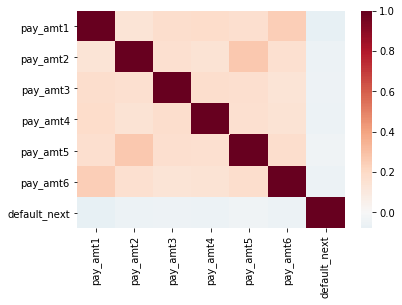

In [16]:
corr = df[attributes_payamt].corr()
_=sn.heatmap(corr, cmap='RdBu_r',center=0)


Prepare the data for machine learning.

In [17]:
y=df.default_next
y.value_counts()

0    7741
1    2259
Name: default_next, dtype: int64

In [18]:
df.columns
x=df.copy()
x.drop(['default_next'],axis=1,inplace=True)
x.columns

Index(['limit_bal', 'sex', 'education', 'marriage', 'age', 'pay_0', 'pay_2',
       'pay_3', 'pay_4', 'pay_5', 'pay_6', 'bill_amt1', 'bill_amt2',
       'bill_amt3', 'bill_amt4', 'bill_amt5', 'bill_amt6', 'pay_amt1',
       'pay_amt2', 'pay_amt3', 'pay_amt4', 'pay_amt5', 'pay_amt6'],
      dtype='object')

### Baseline models

Here I'm giong to employ two common classifiers to get an idea of baseline predictive performance prior to any feature engineering or tuning. 

First up: Logistic Regression

In [19]:
from sklearn.metrics import confusion_matrix
import matplotlib.pyplot as plt

def plot_confusion_matrix(y_true, y_pred, classes,
                          normalize=False,
                          title=None,
                          cmap=plt.cm.Blues):
    """
    This function prints and plots the confusion matrix.
    Normalization can be applied by setting `normalize=True`.
    """
    if not title:
        if normalize:
            title = 'Normalized confusion matrix'
        else:
            title = 'Confusion matrix, without normalization'

    # Compute confusion matrix
    cm = confusion_matrix(y_true, y_pred)
    # Only use the labels that appear in the data
    #classes = classes[unique_labels(y_true, y_pred)]
    if normalize:
        cm = cm.astype('float') / cm.sum(axis=1)[:, np.newaxis]
        print("Normalized confusion matrix")
    else:
        print('Confusion matrix, without normalization')

    #print(cm)

    fig, ax = plt.subplots()
    im = ax.imshow(cm, interpolation='nearest', cmap=cmap)
    ax.figure.colorbar(im, ax=ax)
    # We want to show all ticks...
    ax.set(xticks=np.arange(cm.shape[1]),
           yticks=np.arange(cm.shape[0]),
           # ... and label them with the respective list entries
           xticklabels=classes, yticklabels=classes,
           title=title,
           ylabel='True label',
           xlabel='Predicted label')

    # Rotate the tick labels and set their alignment.
    plt.setp(ax.get_xticklabels(), rotation=45, ha="right",
             rotation_mode="anchor")

    # Loop over data dimensions and create text annotations.
    fmt = '.2f' if normalize else 'd'
    thresh = cm.max() / 2.
    for i in range(cm.shape[0]):
        for j in range(cm.shape[1]):
            ax.text(j, i, format(cm[i, j], fmt),
                    ha="center", va="center",
                    color="white" if cm[i, j] > thresh else "black")
    fig.tight_layout()
    return ax

In [20]:
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split
from sklearn.metrics import roc_auc_score,recall_score, accuracy_score
from sklearn.pipeline import Pipeline
from sklearn.preprocessing import StandardScaler
from imblearn.over_sampling import SMOTE


def predict_logistic(x,y,features=[],do_scale=True,do_resamp=False, show_cm=False,normTF=True):
    
    if len(features)>0:
            x=x[features]
    
    x_train, x_val, y_train, y_val = train_test_split(x,y,test_size=0.2,random_state=3)
    if do_resamp:
        sm = SMOTE(random_state=0, ratio = 1.0)
        x_train, y_train = sm.fit_sample(x_train, y_train)
    
    model = LogisticRegression(random_state=0,solver='lbfgs', multi_class='ovr')
    if do_scale:
        classifier = Pipeline(steps = [('scaler',StandardScaler()),('model',model)])
    else:
        classifier = Pipeline(steps = [('model',model)])
        
    classifier.fit(x_train,y_train)

    y_predict = classifier.predict(x_val)
    auc = roc_auc_score(y_val, y_predict)
    print('AUC (log-reg)=',round(auc,5))
    recall = recall_score(y_val, y_predict)
    print('Recall(log-reg)',round(recall,5))
    
    if show_cm:
        plot_confusion_matrix(y_val, y_predict, classes=['no default','default'],
                          normalize=normTF,
                          title=None,
                          cmap=plt.cm.Blues)


Using TensorFlow backend.


In [21]:
from sklearn.tree import DecisionTreeClassifier

def predict_dtree(x,y,features=[],do_scale=True,do_resamp=False, show_cm=False,normTF=True):
    
    if len(features)>0:
            x=x[features]
    
    x_train, x_val, y_train, y_val = train_test_split(x,y,test_size=0.2,random_state=3)
    if do_resamp:
        sm = SMOTE(random_state=0, ratio = 1.0)
        x_train, y_train = sm.fit_sample(x_train, y_train)
    
    model = DecisionTreeClassifier(max_depth=10,random_state=3)
    if do_scale:
        classifier = Pipeline(steps = [('scaler',StandardScaler()),('model',model)])
    else:
        classifier = Pipeline(steps = [('model',model)])
        
    classifier.fit(x_train,y_train)

    y_predict = classifier.predict(x_val)
    auc = roc_auc_score(y_val, y_predict)
    print('AUC (D-Tree)=',round(auc,5))
    recall = recall_score(y_val, y_predict)
    print('Recall (D-Tree)',round(recall,5))
    
    if show_cm:
        plot_confusion_matrix(y_val, y_predict, classes=['no default','default'],
                          normalize=normTF,
                          title=None,
                          cmap=plt.cm.Blues)

In [22]:
from sklearn.ensemble import RandomForestClassifier

def predict_rand_for(x,y,features=[],do_scale=True,do_resamp=False, show_cm=False,normTF=True):
    
    if len(features)>0:
            x=x[features]
    
    x_train, x_val, y_train, y_val = train_test_split(x,y,test_size=0.2,random_state=3)
    if do_resamp:
        sm = SMOTE(random_state=0, ratio = 1.0)
        x_train, y_train = sm.fit_sample(x_train, y_train)
    
    model = RandomForestClassifier(random_state=3)
    if do_scale:
        classifier = Pipeline(steps = [('scaler',StandardScaler()),('model',model)])
    else:
        classifier = Pipeline(steps = [('model',model)])
        
    classifier.fit(x_train,y_train)

    y_predict = classifier.predict(x_val)
    auc = roc_auc_score(y_val, y_predict)
    print('AUC (D-Tree)=',round(auc,5))
    recall = recall_score(y_val, y_predict)
    print('Recall (D-Tree)',round(recall,5))
    
    if show_cm:
        plot_confusion_matrix(y_val, y_predict, classes=['no default','default'],
                          normalize=normTF,
                          title=None,
                          cmap=plt.cm.Blues)

In [23]:
# All original features
predict_logistic(x,y,features=[], do_scale=True,do_resamp=True,show_cm=False)
predict_dtree(x,y,features=[], do_scale=True,do_resamp=True,show_cm=False)
predict_rand_for(x,y,features=[], do_scale=True,do_resamp=True,show_cm=False)

AUC (log-reg)= 0.6464
Recall(log-reg) 0.59821
AUC (D-Tree)= 0.65196
Recall (D-Tree) 0.42634


/opt/conda/lib/python3.6/site-packages/sklearn/ensemble/forest.py:245: FutureWarning: The default value of n_estimators will change from 10 in version 0.20 to 100 in 0.22.
  "10 in version 0.20 to 100 in 0.22.", FutureWarning)


AUC (D-Tree)= 0.63377
Recall (D-Tree) 0.36161


In [24]:
# These are a basic set of features that appear to be somewhat correlated with default prediction
features_sub1=['limit_bal','pay_amt1','education', 'marriage','pay_0']    
predict_logistic(x,y,features=features_sub1, do_scale=True,do_resamp=True,show_cm=False)
predict_dtree(x,y,features=features_sub1, do_scale=True,do_resamp=True,show_cm=False)

AUC (log-reg)= 0.64248
Recall(log-reg) 0.57812
AUC (D-Tree)= 0.6452
Recall (D-Tree) 0.39286


In [25]:
# Here we've added some 'bill_amt' features to see if the are at all usefull (not really)
features_sub2=['limit_bal','pay_amt1','education', 'marriage','pay_0','bill_amt1','bill_amt2','bill_amt3']  
predict_logistic(x,y,features=features_sub2, do_scale=True,do_resamp=True,show_cm=False)
predict_dtree(x,y,features=features_sub2, do_scale=True,do_resamp=True,show_cm=False)

AUC (log-reg)= 0.64123
Recall(log-reg) 0.5692
AUC (D-Tree)= 0.65715
Recall (D-Tree) 0.45089


In [26]:
# how much do additional pay features help? Ans: a small bit for the recall
features_sub3=['limit_bal','pay_amt1','education', 'marriage','pay_0','pay_2','pay_3','pay_4']    
predict_logistic(x,y,features=features_sub1, do_scale=True,do_resamp=True,show_cm=False)
predict_dtree(x,y,features=features_sub3, do_scale=True,do_resamp=True,show_cm=False)

AUC (log-reg)= 0.64248
Recall(log-reg) 0.57812
AUC (D-Tree)= 0.64868
Recall (D-Tree) 0.40625


In [27]:
x.columns

Index(['limit_bal', 'sex', 'education', 'marriage', 'age', 'pay_0', 'pay_2',
       'pay_3', 'pay_4', 'pay_5', 'pay_6', 'bill_amt1', 'bill_amt2',
       'bill_amt3', 'bill_amt4', 'bill_amt5', 'bill_amt6', 'pay_amt1',
       'pay_amt2', 'pay_amt3', 'pay_amt4', 'pay_amt5', 'pay_amt6'],
      dtype='object')

## Feature Engineering

First lets explore bill amount. Rather than just looking at bill *amount*, lets add bill ratio, for the current and previous bills: BILL_1to2 = BILL_AMT1 / BILL_AMT2. A large increase in bill amount from one month to the next might correlate with default.  Similarly, pay amount might reaveal a similar trend: PAY_1to2 = PAY_AMT1 /PAY_AMT2. Another choice might be BILL_AMT1/PAY_AMT1. A higher bill-to-payment ratio seem likely to we a warning sign of default

The Diffs and the Ratios capture somewhat overlapping trends. Diff maintains scaling which may be useful considering higher borrowing levels may be indicative of default. But the ratios which are be definition normalized, may be better for their simplicity. 


In [28]:
# The Diffs and the Ratios capture somewhat overlapping trends. Diff maining scaling, 
# Which may 
import scipy.stats as ss

# One Month Ratios
f1 = df["bill_amt1"]/df["bill_amt2"]
f2 = df["pay_amt2"]/df["pay_amt1"]

# Four Month Rations
f3 = df["bill_amt1"]/df["bill_amt5"]
f4 = df["pay_amt5"]/df["pay_amt1"]

# One Month Diffs
f5 = df["bill_amt1"]-df["bill_amt2"]
f6 = df["pay_amt2"]-df["pay_amt1"]

# Four Month Diffs
f7 = df["bill_amt1"]-df["bill_amt5"]
f8 = df["pay_amt5"]-df["pay_amt1"]

f9 = df["bill_amt1"]/df["pay_amt1"]
f10 = df["bill_amt1"] -df["pay_amt1"]

atts =['bill_amt1','bill_amt2','bill_amt3','bill_amt4','bill_amt5','bill_amt6']
f11 = df[atts].std(axis=1)
#bils = ['bill_amt1','bill_amt2','bill_amt3','bill_amt4','bill_amt5','bill_amt6']
#bil_std = ss.s



In [29]:
# Incorporate the new features into the dataframe
df_f = df.copy()
new_cols = ['F1','F2','F3','F4','F5','F6','F7','F8','F9','F10']
df_f['f1'] = f1
df_f['f2'] = f2
df_f['f3'] = f3
df_f['f4'] = f4
df_f['f5'] = f5
df_f['f6'] = f6
df_f['f7'] = f7
df_f['f8'] = f8
df_f['f9'] = f9
df_f['f10'] = f10
df_f['f11'] = f11

In [30]:
df_f.columns

Index(['limit_bal', 'sex', 'education', 'marriage', 'age', 'pay_0', 'pay_2',
       'pay_3', 'pay_4', 'pay_5', 'pay_6', 'bill_amt1', 'bill_amt2',
       'bill_amt3', 'bill_amt4', 'bill_amt5', 'bill_amt6', 'pay_amt1',
       'pay_amt2', 'pay_amt3', 'pay_amt4', 'pay_amt5', 'pay_amt6',
       'default_next', 'f1', 'f2', 'f3', 'f4', 'f5', 'f6', 'f7', 'f8', 'f9',
       'f10', 'f11'],
      dtype='object')

In [31]:
cols = df_f.columns.tolist()
#print(cols[23])
cols_new=cols[0:23]
cols_new = cols_new + cols[24:]
cols_new.append(cols[23])
print(cols_new)

['limit_bal', 'sex', 'education', 'marriage', 'age', 'pay_0', 'pay_2', 'pay_3', 'pay_4', 'pay_5', 'pay_6', 'bill_amt1', 'bill_amt2', 'bill_amt3', 'bill_amt4', 'bill_amt5', 'bill_amt6', 'pay_amt1', 'pay_amt2', 'pay_amt3', 'pay_amt4', 'pay_amt5', 'pay_amt6', 'f1', 'f2', 'f3', 'f4', 'f5', 'f6', 'f7', 'f8', 'f9', 'f10', 'f11', 'default_next']


Text(0.5, 1.0, 'Correlation for all Features (inc Engineered)')

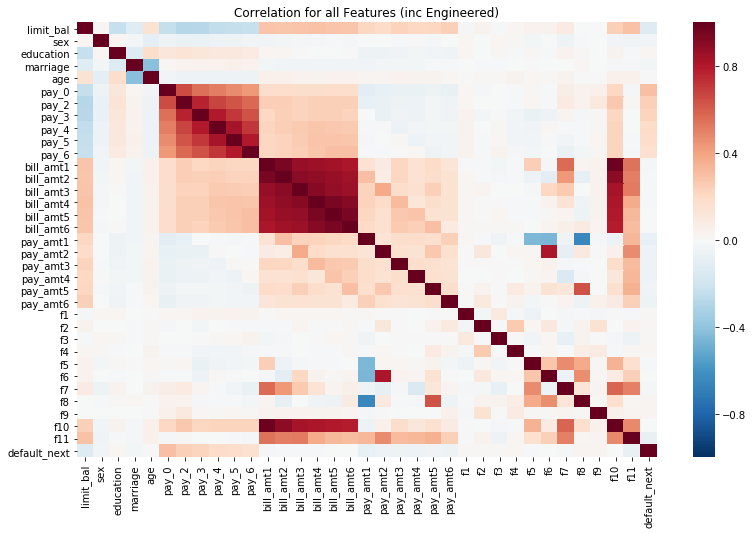

In [32]:
df_f = df_f[cols_new]

corr = df_f.corr()
#cmap = sn.diverging_palette(255, 133, l=60, n=7, center="dark")
fig,ax = plt.subplots(figsize=(13,8))
_=sn.heatmap(corr,cmap='RdBu_r',vmin=-1,vmax=1)


ax.set_title("Correlation for all Features (inc Engineered)")

The new features with ratio are problematic due to generation of infinity when denomenator is 0. Current version drop these features. Should be further explored. Note that I've dropped the colums (for now) rather than droping rows (would have needed to drop 1/4 of rows)

In [33]:
# Check for NAs
df_fdrop = df_f.replace([np.inf, -np.inf], np.nan)
df_fdrop = df_fdrop.dropna(axis=1, how="any")
#df_fdrop = df_f.dropna(axis = 0, how ='any') 

print("Old data frame length:", len(df_f), "\nNew data frame length:",  
       len(df_fdrop), "\nNumber of rows with at least 1 NA value: ", 
       (len(df_f)-len(df_fdrop))) 

Old data frame length: 10000 
New data frame length: 10000 
Number of rows with at least 1 NA value:  0


In [34]:
df_fdrop.columns

Index(['limit_bal', 'sex', 'education', 'marriage', 'age', 'pay_0', 'pay_2',
       'pay_3', 'pay_4', 'pay_5', 'pay_6', 'bill_amt1', 'bill_amt2',
       'bill_amt3', 'bill_amt4', 'bill_amt5', 'bill_amt6', 'pay_amt1',
       'pay_amt2', 'pay_amt3', 'pay_amt4', 'pay_amt5', 'pay_amt6', 'f5', 'f6',
       'f7', 'f8', 'f10', 'f11', 'default_next'],
      dtype='object')

In [35]:
y=df_fdrop.default_next
y.value_counts()

x=df_fdrop.copy()
x.drop(['default_next'],axis=1,inplace=True)
x.columns

Index(['limit_bal', 'sex', 'education', 'marriage', 'age', 'pay_0', 'pay_2',
       'pay_3', 'pay_4', 'pay_5', 'pay_6', 'bill_amt1', 'bill_amt2',
       'bill_amt3', 'bill_amt4', 'bill_amt5', 'bill_amt6', 'pay_amt1',
       'pay_amt2', 'pay_amt3', 'pay_amt4', 'pay_amt5', 'pay_amt6', 'f5', 'f6',
       'f7', 'f8', 'f10', 'f11'],
      dtype='object')

In [36]:
x.describe()

,limit_bal,sex,education,marriage,age,pay_0,pay_2,pay_3,pay_4,pay_5,...,pay_amt3,pay_amt4,pay_amt5,pay_amt6,f5,f6,f7,f8,f10,f11
count,10000.000000,10000.00000,10000.00000,10000.000000,10000.000000,10000.000000,10000.000000,10000.000000,10000.000000,10000.000000,...,10000.000000,10000.000000,10000.00000,10000.000000,10000.000000,1.000000e+04,10000.000000,10000.000000,10000.000000,10000.000000
mean,165877.600000,1.57940,1.81690,1.570100,35.388500,0.004800,-0.140400,-0.155700,-0.237000,-0.253200,...,4536.424100,4678.900800,4832.08920,5324.098000,1902.519600,1.635000e+02,10679.969300,-786.814000,44233.969200,11622.572100
std,130049.370249,0.49368,0.76592,0.522985,9.313262,1.125924,1.206828,1.221477,1.143662,1.132704,...,16073.050517,14578.848909,15220.32993,18578.265054,21874.673642,2.664603e+04,39132.419629,19776.626069,71054.802892,20001.097327
min,10000.000000,1.00000,0.00000,0.000000,21.000000,-2.000000,-2.000000,-2.000000,-2.000000,-2.000000,...,0.000000,0.000000,0.00000,0.000000,-398516.000000,-4.050160e+05,-387910.000000,-377016.000000,-398516.000000,0.000000
25%,50000.000000,1.00000,1.00000,1.000000,28.000000,-1.000000,-1.000000,-1.000000,-1.000000,-1.000000,...,277.750000,221.500000,200.00000,0.000000,-1613.000000,-1.300000e+03,-2657.000000,-2000.000000,600.000000,1496.723836
50%,140000.000000,2.00000,2.00000,2.000000,34.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,1493.000000,1500.000000,1500.00000,1352.500000,0.000000,0.000000e+00,548.000000,-500.000000,18376.500000,4421.203881
75%,240000.000000,2.00000,2.00000,2.000000,41.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,4000.000000,4000.000000,4016.25000,4000.000000,2116.500000,5.842500e+02,16014.250000,313.000000,60262.250000,13753.231513
max,1000000.000000,2.00000,6.00000,3.000000,75.000000,8.000000,8.000000,8.000000,8.000000,8.000000,...,896040.000000,497000.000000,379267.00000,528666.000000,418935.000000,1.679893e+06,504644.000000,374901.000000,913727.000000,647788.051081


In [37]:
predict_logistic(x,y,features=[], do_scale=True,do_resamp=True,show_cm=False)
predict_dtree(x,y,features=[], do_scale=True,do_resamp=True,show_cm=False)
predict_rand_for(x,y,features=[], do_scale=True,do_resamp=True,show_cm=False)

AUC (log-reg)= 0.64561
Recall(log-reg) 0.59598
AUC (D-Tree)= 0.65503
Recall (D-Tree) 0.42411


/opt/conda/lib/python3.6/site-packages/sklearn/ensemble/forest.py:245: FutureWarning: The default value of n_estimators will change from 10 in version 0.20 to 100 in 0.22.
  "10 in version 0.20 to 100 in 0.22.", FutureWarning)


AUC (D-Tree)= 0.63186
Recall (D-Tree) 0.35714


In [38]:
x.columns

Index(['limit_bal', 'sex', 'education', 'marriage', 'age', 'pay_0', 'pay_2',
       'pay_3', 'pay_4', 'pay_5', 'pay_6', 'bill_amt1', 'bill_amt2',
       'bill_amt3', 'bill_amt4', 'bill_amt5', 'bill_amt6', 'pay_amt1',
       'pay_amt2', 'pay_amt3', 'pay_amt4', 'pay_amt5', 'pay_amt6', 'f5', 'f6',
       'f7', 'f8', 'f10', 'f11'],
      dtype='object')

AUC (log-reg)= 0.64171
Recall(log-reg) 0.57143
Normalized confusion matrix
AUC (D-Tree)= 0.6374
Recall (D-Tree) 0.40625
Normalized confusion matrix


/opt/conda/lib/python3.6/site-packages/sklearn/ensemble/forest.py:245: FutureWarning: The default value of n_estimators will change from 10 in version 0.20 to 100 in 0.22.
  "10 in version 0.20 to 100 in 0.22.", FutureWarning)


AUC (D-Tree)= 0.62958
Recall (D-Tree) 0.36161
Normalized confusion matrix


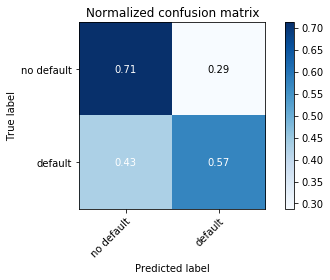

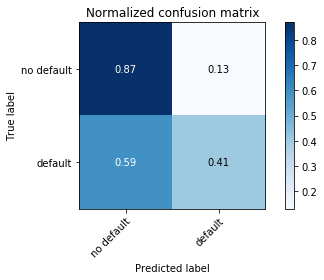

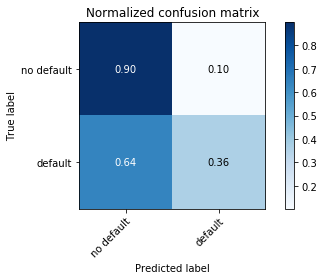

In [39]:
features_sub4=['limit_bal','pay_amt1','education', 'marriage','pay_0','pay_2',
               'pay_amt1','pay_amt2','f5','f6','f7','f8','f10','f11'] 
predict_logistic(x,y,features=features_sub4, do_scale=True,do_resamp=True,show_cm=True)
predict_dtree(x,y,features=features_sub4,do_scale=True,do_resamp=True,show_cm=True)
predict_rand_for(x,y,features=features_sub4,do_scale=True,do_resamp=True,show_cm=True)


Ideas for indicator variables and combined feature vairiables:
1. Male and under 25